In [1]:
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
data_train = pd.read_csv('DailyDelhiClimateTrain.csv')
data_train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [6]:
data_train.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

Text(0.5, 1.0, 'Teperature average')

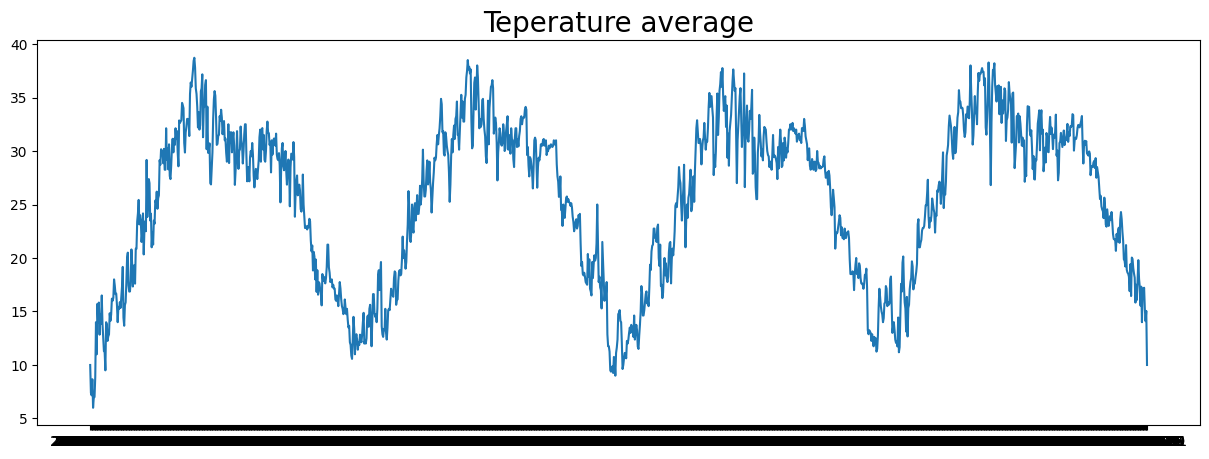

In [7]:
dates = data_train['date'].values
temp = data_train['meantemp'].values

plt.figure(figsize=(15, 5))
plt.plot(dates, temp)
plt.title('Teperature average', fontsize=20)

Tuliskan finsi di bawah ini yang dapat mengubah data kita menjadi format yang dapat diterima oleh model. fungsi dibawah menerima sebuah series/atribut kita yang telah dikonversi menjadi tipe numpy, lalu mengembalukan label dan atribut dari dataset dalam bentuk batch.

In [8]:
def windowed_dataset(series, window_size, bacth_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(bacth_size).prefetch(1)

In [9]:
train_set = windowed_dataset(temp, window_size=60, bacth_size=100, shuffle_buffer=1000)
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(60, return_sequences=True),
    tf.keras.layers.LSTM(60),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-04, momentum=0.9)
model.compile(
    loss= tf.keras.losses.Huber(),
    optimizer=optimizer,
    metrics=["mae"])